In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import pandas as pd
import os
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import random
import math

%matplotlib inline
np.set_printoptions(precision=2,suppress=True)

In [2]:
# Settign up a work space
batch_size = 100
number_of_chemicals = 3

work_space_size = math.comb(batch_size + number_of_chemicals - 1, number_of_chemicals - 1)
np.random.seed(1)

In [3]:
work_space_size

5151

In [4]:
# Creating thw work space
lLim, uLim = 0, 100
y_us = np.linspace(lLim, uLim, num = work_space_size)
y = np.linspace(lLim, uLim, num = work_space_size)
np.random.shuffle(y)

[22.16 41.15 78.   ... 17.57 77.28  4.56]


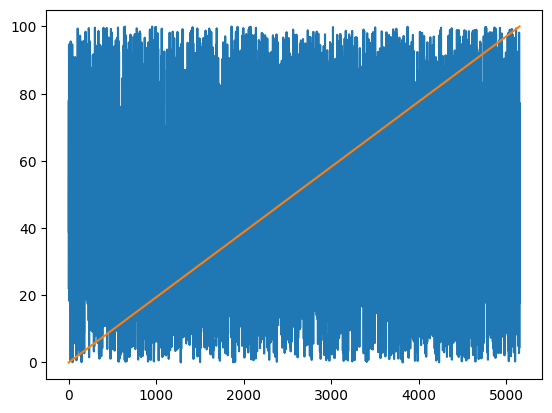

In [5]:
print(y)
plt.plot(y)
plt.plot(np.sort(y))

In [6]:
# Monte Carlo Simulation
num_MC_sim = 1000
perfomance_th = [0.5, 0.75, 0.85, 0.95, 0.99]

result_MC_sim = []

for i_MC in range(num_MC_sim):

  np.random.shuffle(y)

  track = []
  per_track = [0]*len(perfomance_th)

  for ia in range(len(y)):
    if ia == 0:
      loop_max = y[ia]
      track.append(loop_max)
    else:
      if y[ia]>loop_max: loop_max = y[ia]

    for ic in range(len(perfomance_th)):
      if y[ia] >= perfomance_th[ic]*uLim and per_track[ic] == 0: per_track[ic] = ia

    track.append(loop_max)

  result_MC_sim.append(per_track)

result_MC_sim = np.array(result_MC_sim).T


In [7]:
# Cumulative Distribution Function Generation
cdf = []

for _i_MC in range(len(result_MC_sim)):
  cdf_line = []
  cdf_sum = 0
  for _j_MC in range(work_space_size):
    cdf_sum = cdf_sum + np.count_nonzero(result_MC_sim[_i_MC] == _j_MC+1)/num_MC_sim*100
    cdf_line.append(cdf_sum)
  cdf.append(cdf_line)

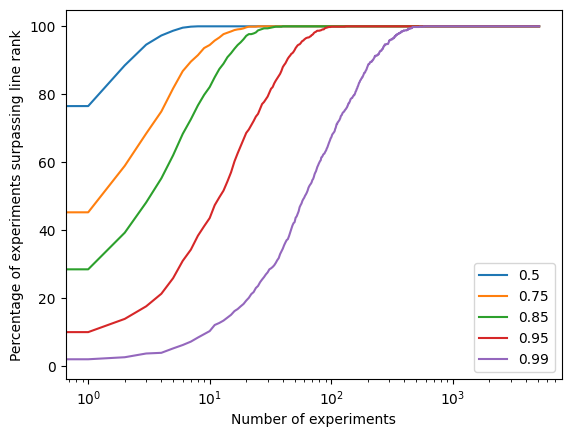

In [8]:
# CDF Visualizer
for _ in range(len(cdf)):
  plt.plot(cdf[_], label = perfomance_th[_])

plt.xscale("log")
plt.xlabel("Number of experiments")
plt.ylabel("Percentage of experiments surpassing line rank")
#plt.yscale("log")
plt.legend()